# Playstore App Rating Predictor

Dataset: https://www.kaggle.com/lava18/google-play-store-apps

## Exploratory Data Analysis (EDA)

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.shape

(10841, 13)

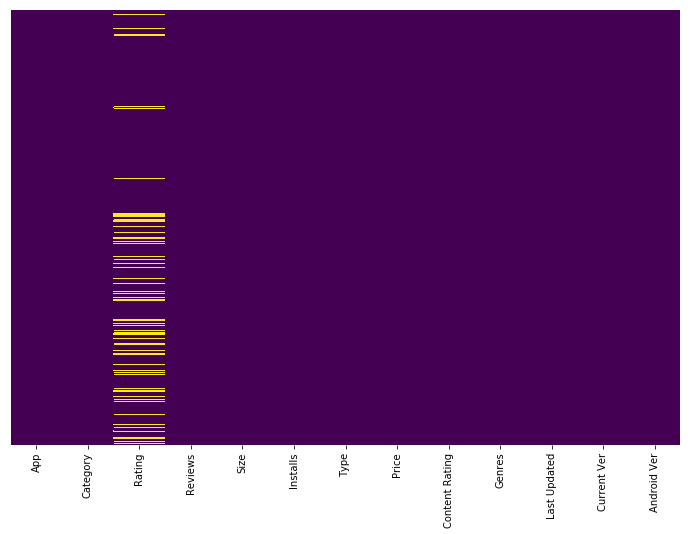

In [5]:
# Checking for null values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
df['Category'].nunique()

34

In [7]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

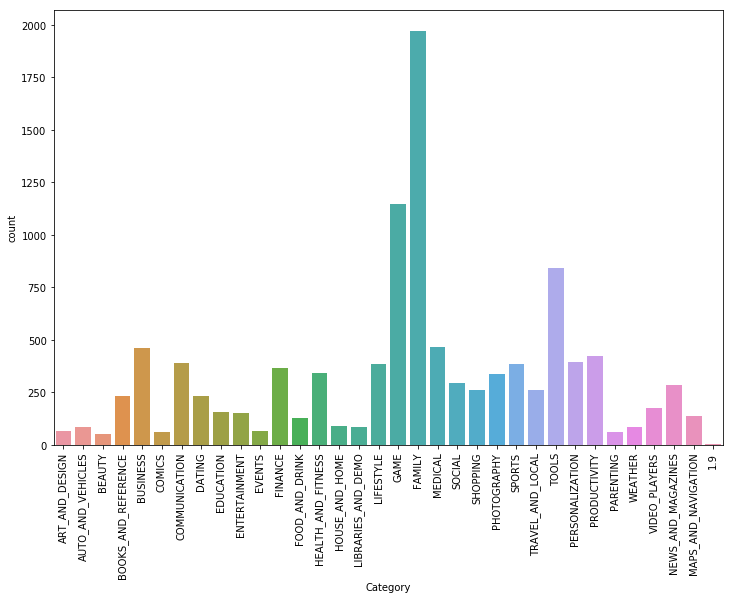

In [8]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Category', data=df)
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [9]:
df_top_cat = df['Category'].value_counts()[:5].index.values.tolist()

In [10]:
df_top_cat

['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS']


From the graph we can see that the Family, Game and Tools apps occupies most of the playstore market.


In [11]:
df_top_cat_data = df[df['Category'].isin(df_top_cat)]

In [12]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [13]:
Installs_Order = ['Free', '0', '0+','1+','5+','10+', '50+', '100+', '500+', '1,000+', '5,000+','10,000+', '50,000+', 
                 '100,000+', '500,000+', '1,000,000+', '5,000,000+', '10,000,000+', '50,000,000+', '100,000,000+', 
                 '500,000,000+','1,000,000,000+']

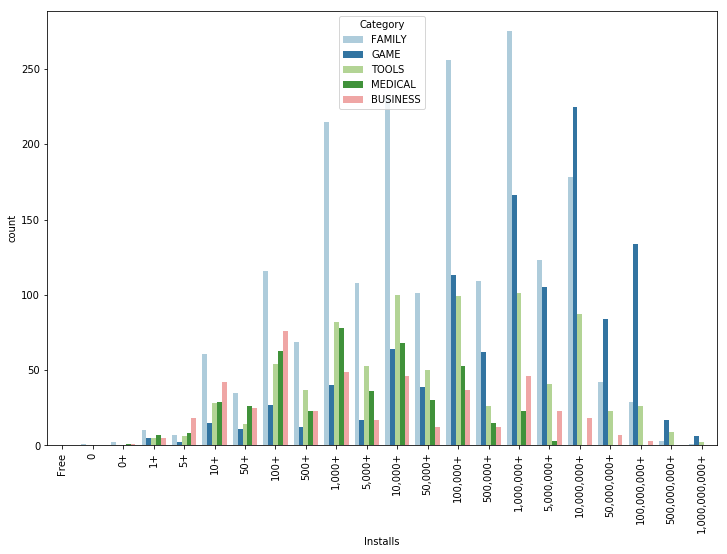

In [14]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Installs', hue='Category', hue_order=df_top_cat, data=df_top_cat_data, order=Installs_Order, palette='Paired')
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

By camparing Installs and the top five Category, we get to know that number of installation of family apps are widely spread with only few numbers of family apps with more that 500,000,000 installs. On the other hands games app seems to do well on playstore as most of the games apps have very high numbers of installs.

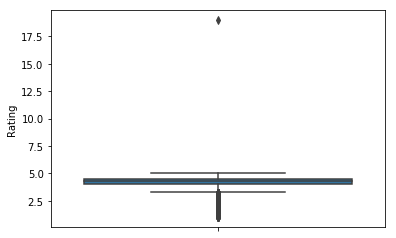

In [15]:
# Visualizing Rating
sns.boxplot(x='Rating', data=df, orient='vertical')

In [16]:
# there is one outlier in rating which is needed to be remove 
df[df['Rating']>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [17]:
df.drop([10472],inplace=True)

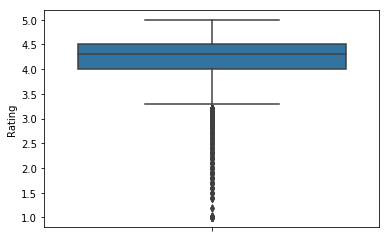

In [18]:
sns.boxplot(x='Rating', data=df, orient='vertical')

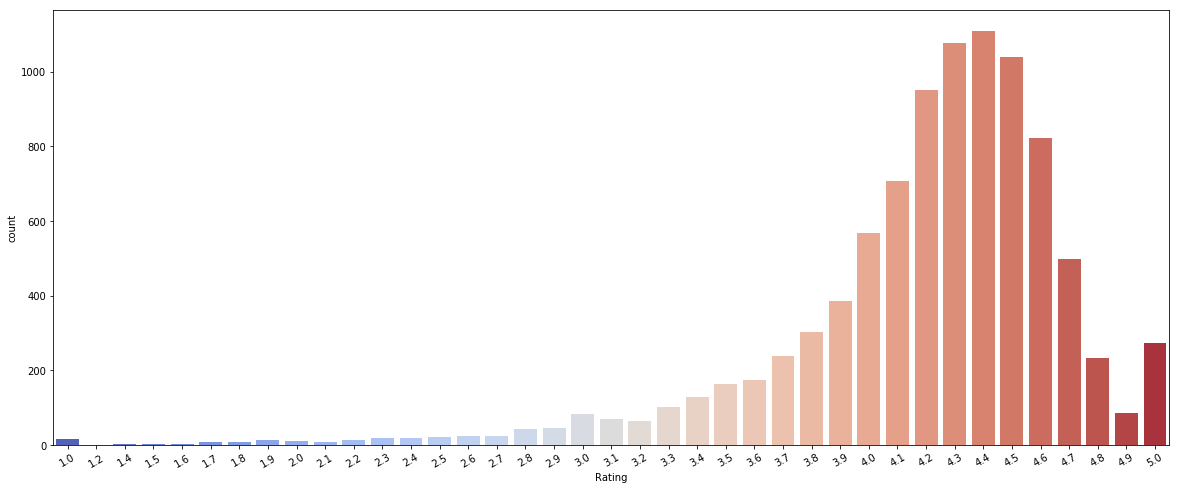

In [19]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Rating', data=df, palette='coolwarm')
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

We are getting a normal distrution for Rating but it is skewed towards right which means that most of the apps in the dataset have high rating, as we can see that there are only few apps below 3.0 rating.

In [20]:
df['Category'].nunique()

33

In [21]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [22]:
df_cat = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION']

Visualizing how rating is spread among each category

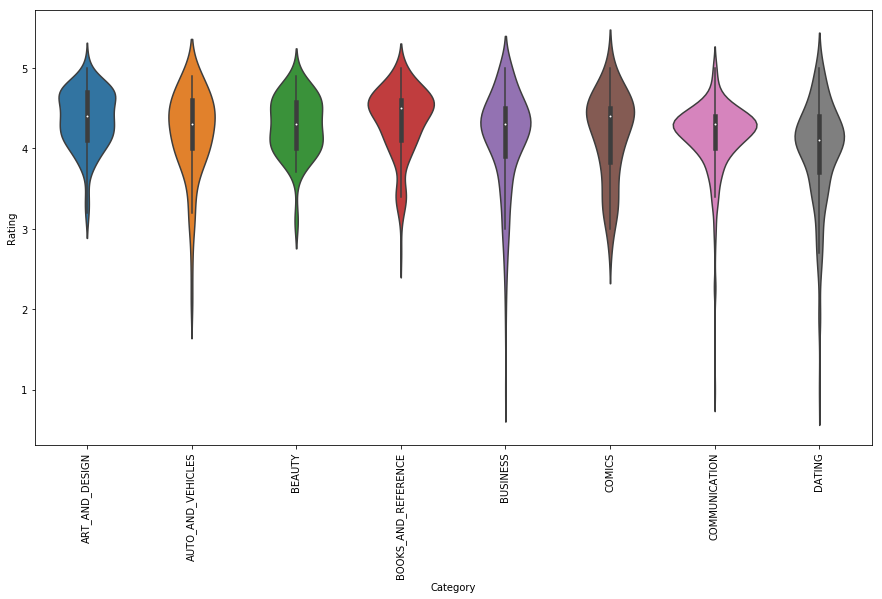

In [23]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Category', y='Rating', data=df[df['Category'].isin(df_cat[:8])])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

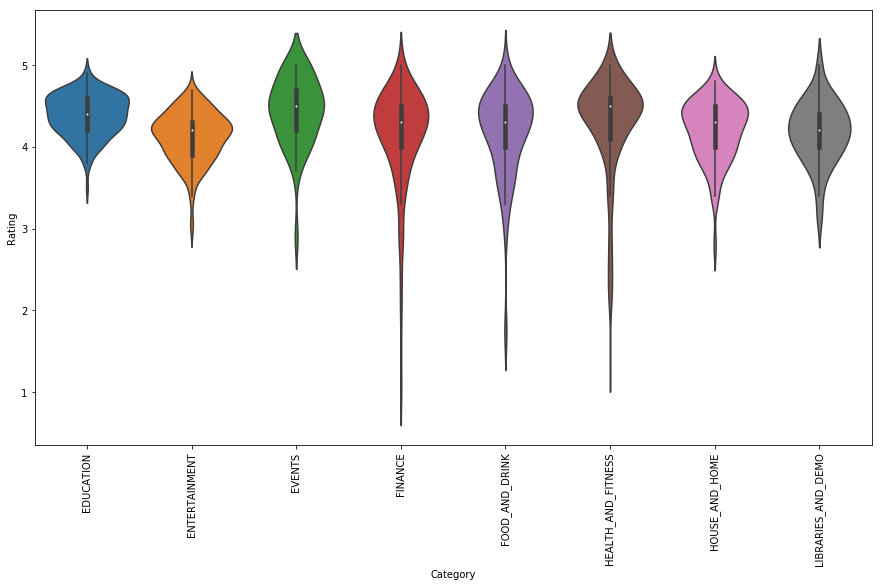

In [24]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Category', y='Rating', data=df[df['Category'].isin(df_cat[8:16])])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

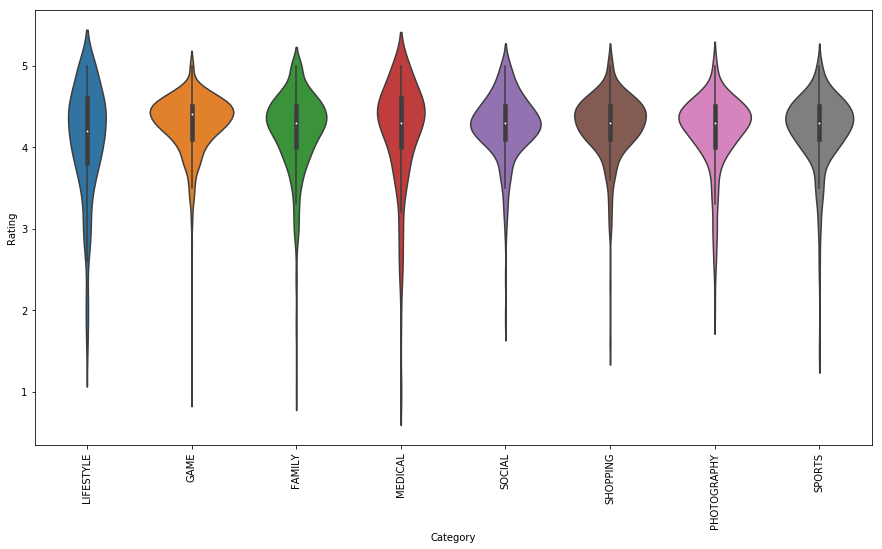

In [25]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Category', y='Rating', data=df[df['Category'].isin(df_cat[16:24])])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

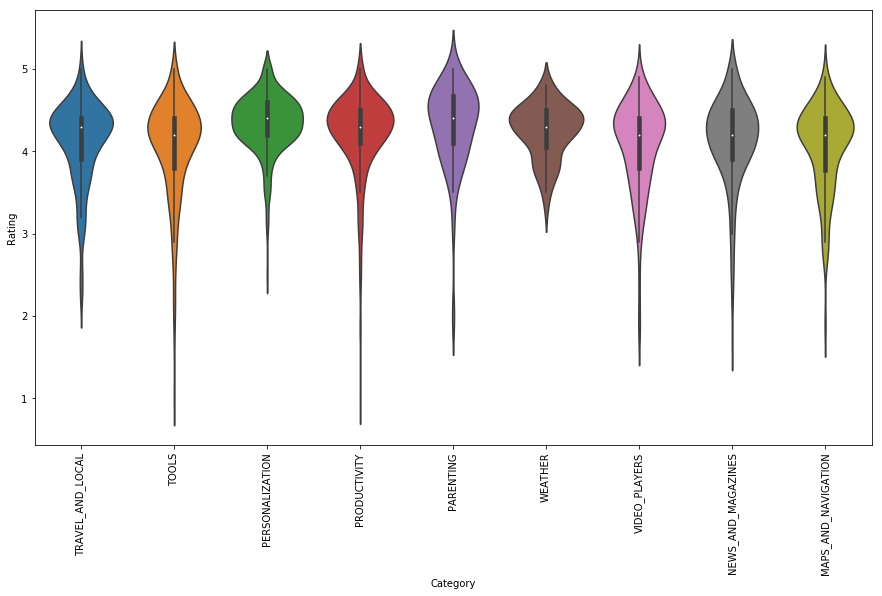

In [26]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Category', y='Rating', data=df[df['Category'].isin(df_cat[24:])])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

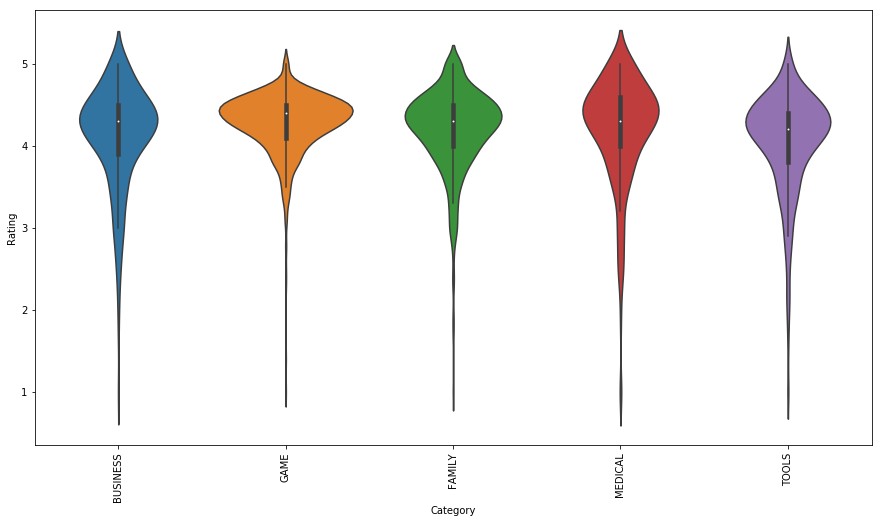

In [27]:
# top category and there rating

plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Category', y='Rating', data=df[df['Category'].isin(df_top_cat)])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Again from this comparision its clear that there very few app with less rating and some categories like Weather and Education apps doesn't have rating below 3.

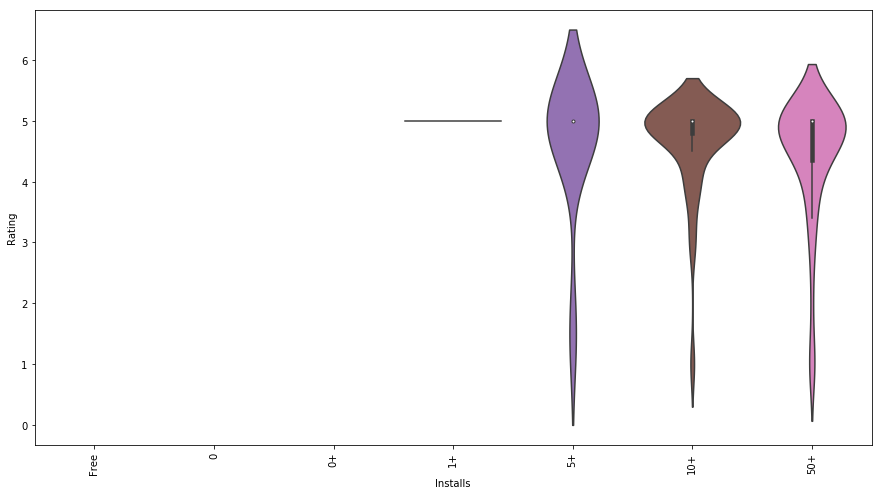

In [28]:
# Visualizing rating spread with installs
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Installs', y='Rating', data=df[df['Installs'].isin(Installs_Order[:7])], order=Installs_Order[:7])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

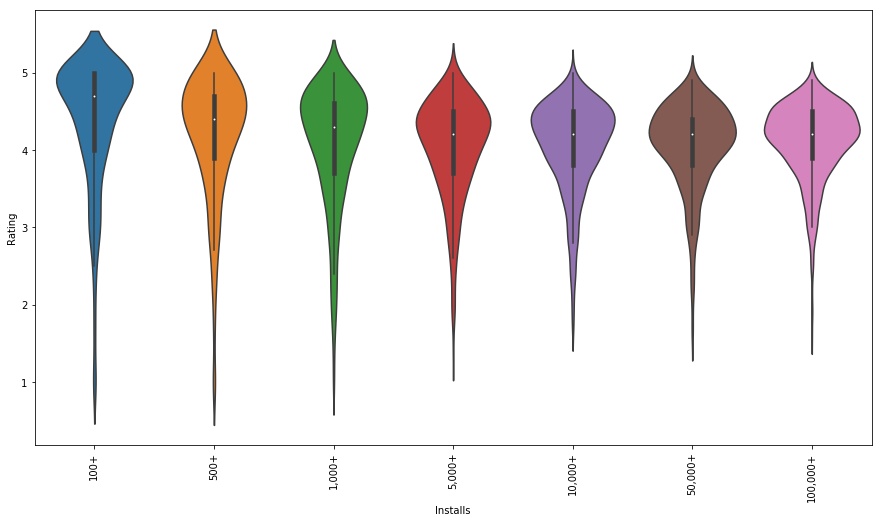

In [29]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Installs', y='Rating', data=df[df['Installs'].isin(Installs_Order[7:14])], order=Installs_Order[7:14])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

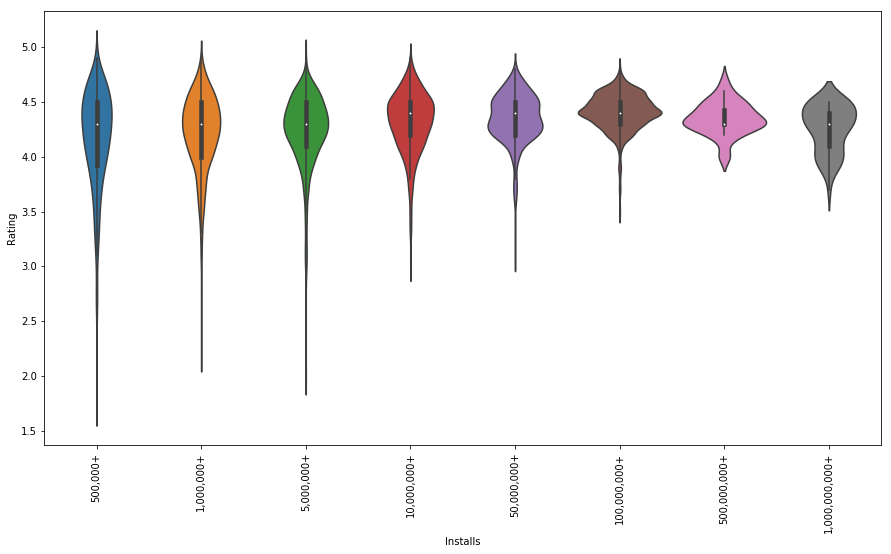

In [30]:
plt.figure(figsize=(15,8))
ax = sns.violinplot(x='Installs', y='Rating', data=df[df['Installs'].isin(Installs_Order[14:])], order=Installs_Order[14:])
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

In [31]:
type(df['Reviews'][0])

str

In [32]:
# Changing Review type from string to integer
df['Reviews'] = df['Reviews'].astype(int)

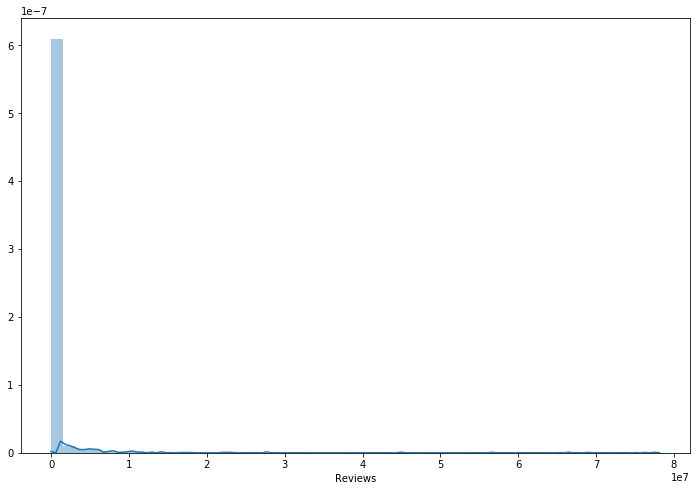

In [33]:
plt.figure(figsize=(12,8))
sns.distplot(df['Reviews'])

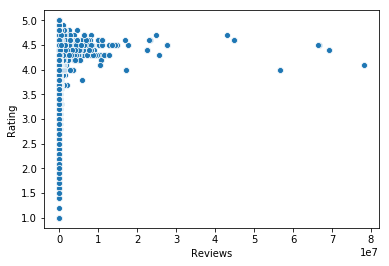

In [34]:
sns.scatterplot(x='Reviews', y='Rating', data=df)

From the graph we get to know that apps with high number of reviews have higer rating.

In [35]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [36]:
df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

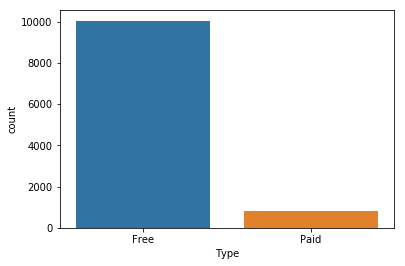

In [37]:
sns.countplot(df['Type'])

Most of the apps on playstore is Free.

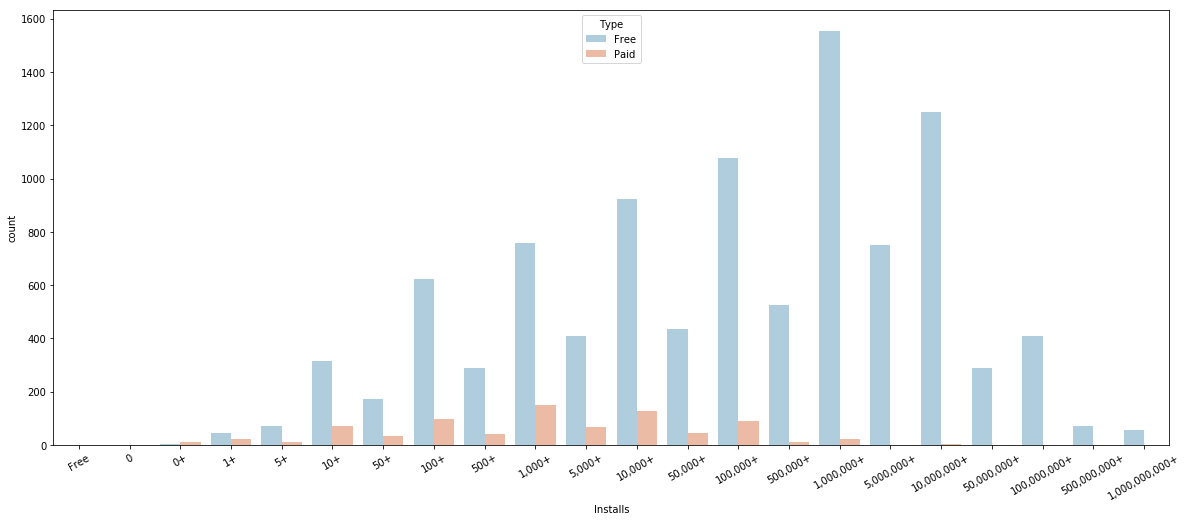

In [38]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Installs', hue='Type', data=df, palette='RdBu_r', order=Installs_Order)
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Its obvious that free app will gets more installs than paid apps, which is shown by the above graph.

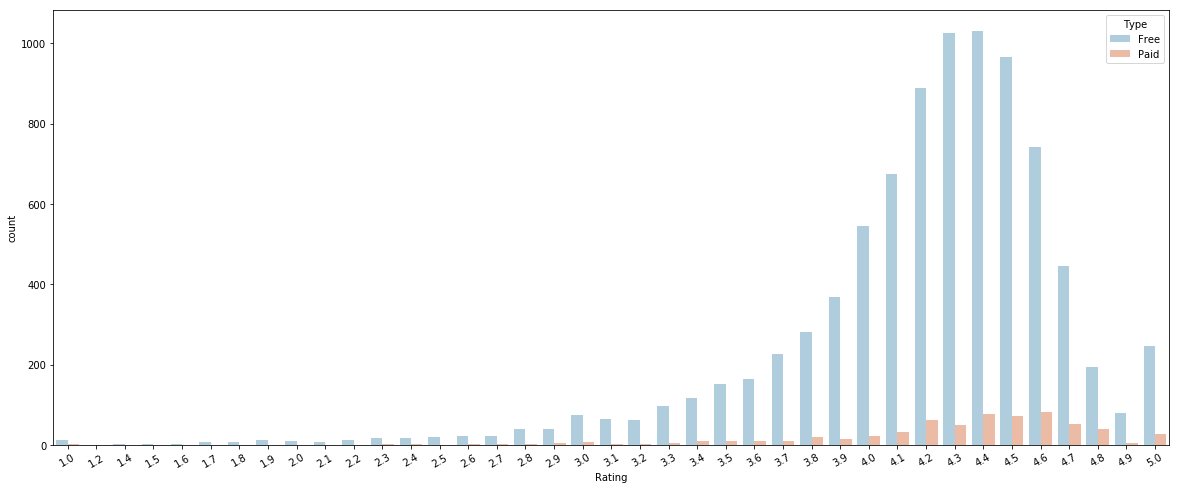

In [39]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Rating', hue='Type', data=df, palette='RdBu_r')
lst = ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

Paid apps have mostly got higher rating.

In [40]:
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

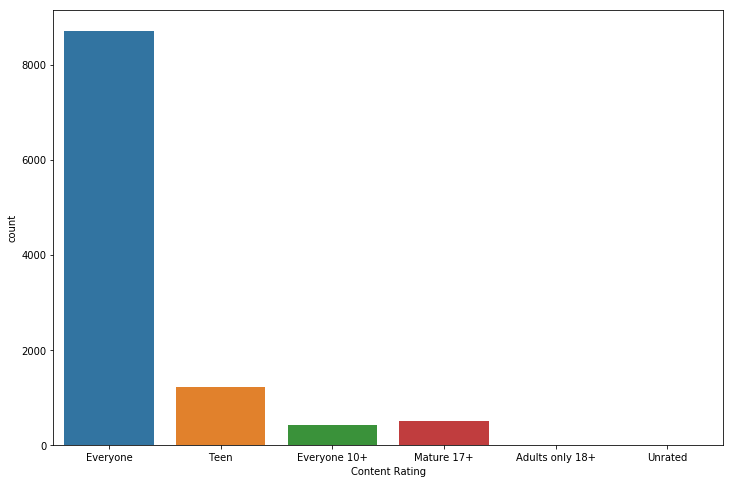

In [41]:
plt.figure(figsize=(12,8))
ax = sns.countplot(x='Content Rating', data=df)

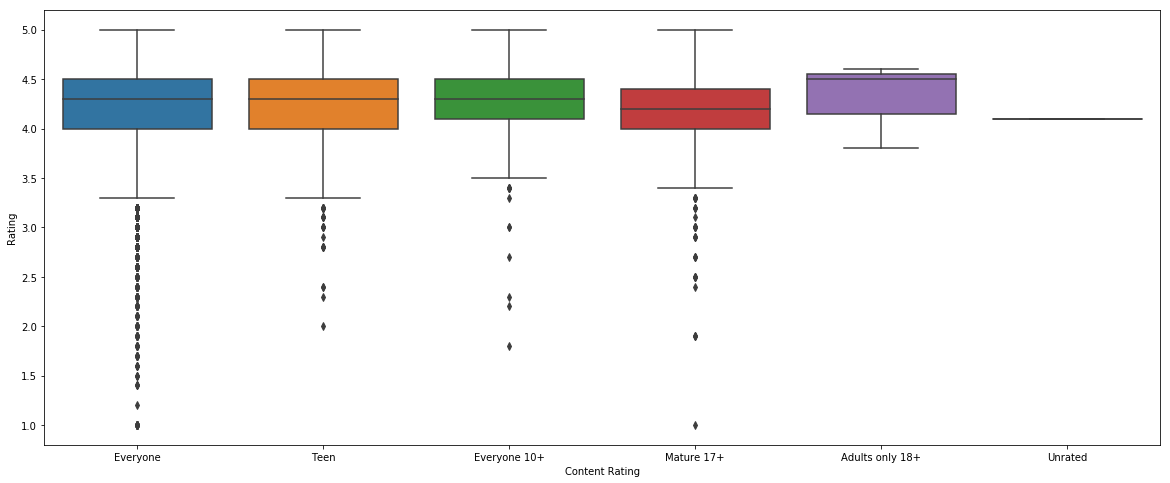

In [42]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Content Rating', y='Rating', data=df)

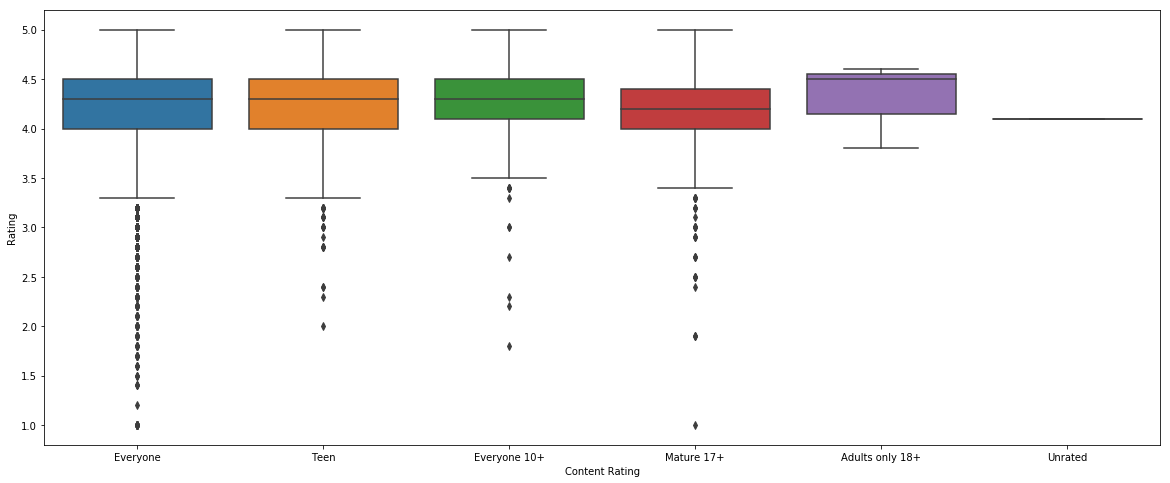

In [43]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Content Rating', y='Rating', data=df[df['Rating'] <= 5])

## Data Cleaning

In [44]:
df.shape

(10840, 13)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
App               10840 non-null object
Category          10840 non-null object
Rating            9366 non-null float64
Reviews           10840 non-null int32
Size              10840 non-null object
Installs          10840 non-null object
Type              10839 non-null object
Price             10840 non-null object
Content Rating    10840 non-null object
Genres            10840 non-null object
Last Updated      10840 non-null object
Current Ver       10832 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), int32(1), object(11)
memory usage: 1.4+ MB


In [46]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

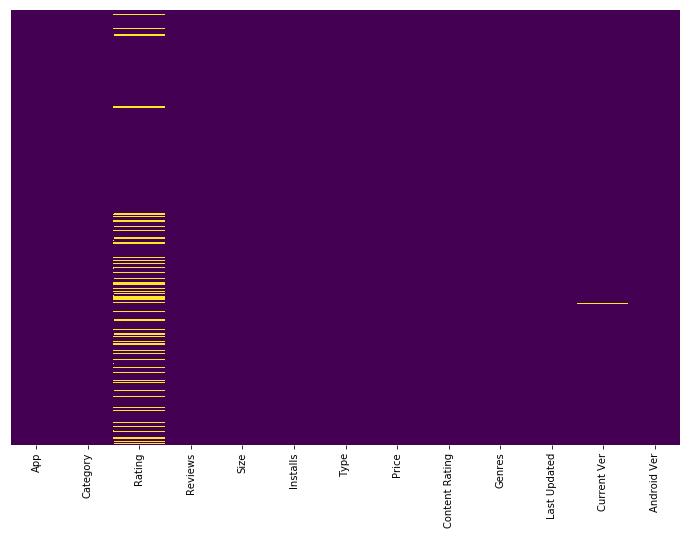

In [47]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [48]:
df.isnull().sum()/len(df)

App               0.000000
Category          0.000000
Rating            0.135978
Reviews           0.000000
Size              0.000000
Installs          0.000000
Type              0.000092
Price             0.000000
Content Rating    0.000000
Genres            0.000000
Last Updated      0.000000
Current Ver       0.000738
Android Ver       0.000185
dtype: float64

In [49]:
# As Rating is the target feature removing rows with null value

df = df[df['Rating'].notna()]

In [50]:
df.shape

(9366, 13)

In [51]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

In [52]:
df = df[df['Current Ver'].notna()]

In [53]:
df = df[df['Android Ver'].notna()]

In [54]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [55]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Feature Engineering

In [56]:
df.shape

(9360, 13)

In [57]:
# Name of app is not needed
df = df.drop('App', axis=1)

Creating three columns from size as size are in mb, kb and size can varies

In [58]:
df['Size_Varies'] = df['Size'].apply(lambda x: 1 if x == 'Varies with device' else 0)

In [59]:
df['Size_in_Mb'] = df['Size'].apply(lambda x: 1 if x[-1] == 'M' else 0)

In [60]:
df['Size_in_Kb'] = df['Size'].apply(lambda x: 1 if x[-1] == 'k' else 0)

In [61]:
df['Size'] = df['Size'].apply(lambda x: x.replace('Varies with device','-1'))

In [62]:
df['Size'] = df['Size'].apply(lambda x: x.replace('M',''))

In [63]:
df['Size'] = df['Size'].apply(lambda x: x.replace('k',''))

In [64]:
# Changing Size type from string to float
df['Size'] = df['Size'].astype(float)

In [65]:
# Removing $ so the price can be converted to float
df['Price'] = df['Price'].apply(lambda x: x.replace('$',''))

In [66]:
df['Price'] = df['Price'].astype(float)

In [67]:
# some apps have more then one genre, so spliting them.
df['Genres'] = df['Genres'].apply(lambda x: x.split(';'))

In [68]:
df['Genres'].value_counts()

[Tools]                                   732
[Entertainment]                           533
[Education]                               468
[Action]                                  358
[Productivity]                            351
[Medical]                                 350
[Sports]                                  333
[Communication]                           328
[Finance]                                 323
[Photography]                             317
[Lifestyle]                               313
[Personalization]                         312
[Business]                                303
[Health & Fitness]                        297
[Social]                                  259
[Shopping]                                238
[News & Magazines]                        233
[Travel & Local]                          225
[Arcade]                                  207
[Dating]                                  195
[Simulation]                              194
[Casual]                          

In [69]:
Genres_lst = set()

def Genres_lst_generator(data):
    for lst in data:
        for i in lst:
            Genres_lst.add(i)

In [70]:
Genres_lst_generator(df['Genres'])

In [71]:
# generating list of all genres
Genres_lst = list(Genres_lst)

In [72]:
# Adding feature for each genre
for Genre in Genres_lst:
    df[Genre] = df['Genres'].apply(lambda x: 1 if Genre in x else 0)

In [73]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df.head())

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_Varies,Size_in_Mb,Size_in_Kb,Events,Word,Weather,Finance,Music & Video,Personalization,Simulation,Libraries & Demo,Medical,Art & Design,Dating,Lifestyle,Adventure,House & Home,Board,Casino,Entertainment,Communication,Role Playing,Business,Parenting,Health & Fitness,Arcade,Pretend Play,Comics,Music,Racing,Photography,Card,Travel & Local,News & Magazines,Action,Casual,Maps & Navigation,Brain Games,Puzzle,Food & Drink,Education,Auto & Vehicles,Creativity,Tools,Sports,Video Players & Editors,Educational,Action & Adventure,Productivity,Social,Strategy,Shopping,Trivia,Music & Audio,Books & Reference,Beauty
0,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0.0,Everyone,[Art & Design],"January 7, 2018",1.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0.0,Everyone,"[Art & Design, Pretend Play]","January 15, 2018",2.0.0,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0.0,Everyone,[Art & Design],"August 1, 2018",1.2.4,4.0.3 and up,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0.0,Teen,[Art & Design],"June 8, 2018",Varies with device,4.2 and up,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0.0,Everyone,"[Art & Design, Creativity]","June 20, 2018",1.1,4.4 and up,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
df['Last Updated Year'] = df['Last Updated'].apply(lambda x: 2020 - int(x[-4:]))

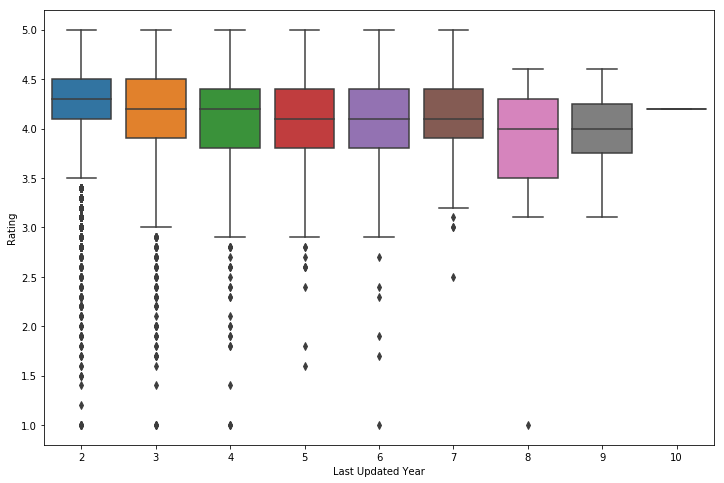

In [75]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Last Updated Year', y='Rating', data=df)

In [76]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1129
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             337
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              15
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
5.0 - 6.0                1
7.0 - 7.1.1              1
4.1 - 7.1.1              1
Name: Android Ver, dtype: int64

Converting Android verisions in proper categories

In [77]:
df['Android Ver'] = df['Android Ver'].apply(lambda x: '4.0 and up' if x[0] == '4' 
                                            else ('5.0 and up' if x[0] == '5' 
                                                  else ('6.0 and up' if x[0] == '6' 
                                                        else ('7.0 and up' if x[0] == '7' 
                                                              else ('8.0 and up' if x[0] == '8' 
                                                                    else ('1.0 and up' if x[0] == '1' 
                                                                          else ('2.0 and up' if x[0] == '2' 
                                                                                else ('3.0 and up' if x[0] == '3' else x))))))))

In [78]:
df['Android Ver'].value_counts()

4.0 and up            5856
Varies with device    1319
2.0 and up            1177
5.0 and up             556
3.0 and up             250
1.0 and up             104
6.0 and up              48
7.0 and up              45
8.0 and up               5
Name: Android Ver, dtype: int64

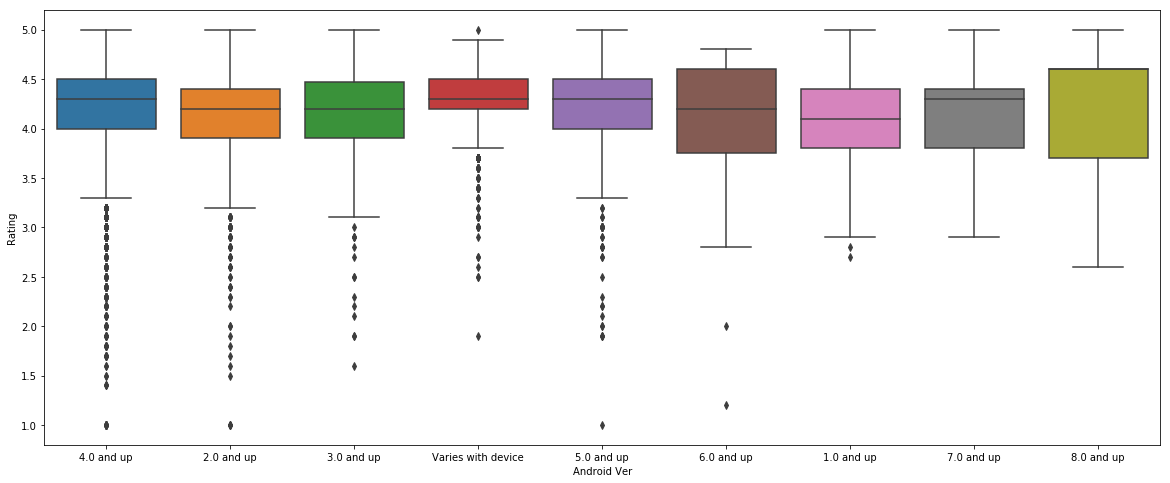

In [79]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Android Ver', y='Rating', data=df)

In [80]:
df.to_csv('data.csv', index=False)

## Model Building

In [81]:
df.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_Varies', 'Size_in_Mb', 'Size_in_Kb', 'Events',
       'Word', 'Weather', 'Finance', 'Music & Video', 'Personalization',
       'Simulation', 'Libraries & Demo', 'Medical', 'Art & Design', 'Dating',
       'Lifestyle', 'Adventure', 'House & Home', 'Board', 'Casino',
       'Entertainment', 'Communication', 'Role Playing', 'Business',
       'Parenting', 'Health & Fitness', 'Arcade', 'Pretend Play', 'Comics',
       'Music', 'Racing', 'Photography', 'Card', 'Travel & Local',
       'News & Magazines', 'Action', 'Casual', 'Maps & Navigation',
       'Brain Games', 'Puzzle', 'Food & Drink', 'Education', 'Auto & Vehicles',
       'Creativity', 'Tools', 'Sports', 'Video Players & Editors',
       'Educational', 'Action & Adventure', 'Productivity', 'Social',
       'Strategy', 'Shopping', 'Trivia', 'Music & Audio', 'Books &

In [82]:
df_model = df[['Rating', 'Reviews', 'Size', 'Installs', 'Type', 
       'Size_Varies', 'Size_in_Mb', 'Size_in_Kb']]

In [83]:
df_dum = pd.get_dummies(df_model, columns=['Installs', 'Type'], drop_first=True)

In [84]:
df_dum.head()

,Rating,Reviews,Size,Size_Varies,Size_in_Mb,Size_in_Kb,"Installs_1,000+","Installs_1,000,000+","Installs_1,000,000,000+",Installs_10+,...,Installs_5+,"Installs_5,000+","Installs_5,000,000+",Installs_50+,"Installs_50,000+","Installs_50,000,000+",Installs_500+,"Installs_500,000+","Installs_500,000,000+",Type_Paid
0,4.1,159,19.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.9,967,14.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,4.7,87510,8.7,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,4.5,215644,25.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4.3,967,2.8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# train test split
from sklearn.model_selection import train_test_split

In [86]:
X = df_dum.drop('Rating', axis =1)
y = df_dum.Rating.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Scaling

In [87]:
from sklearn.preprocessing import MinMaxScaler

In [88]:
scaler = MinMaxScaler()

In [89]:
X_train= scaler.fit_transform(X_train)

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [90]:
X_test = scaler.transform(X_test)

## Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error

In [92]:
lm = LinearRegression()

In [93]:
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.34917746871736316

In [94]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [95]:
y_pred_lm = lm.predict(X_test)

In [96]:
mean_absolute_error(y_test, y_pred_lm)

0.3444732405181624

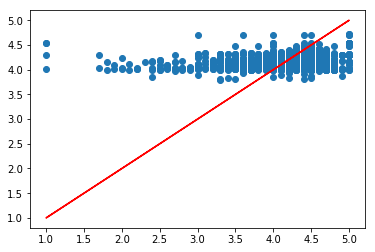

In [97]:
# Our predictions
plt.scatter(y_test,y_pred_lm)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Lasso Regression

In [98]:
# laso regression
lm_l = Lasso()

In [99]:
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.36284805689102567

In [100]:
lm_l.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [101]:
y_pred_lm_l = lm_l.predict(X_test)

In [102]:
mean_absolute_error(y_test, y_pred_lm_l)

0.3520293866197311

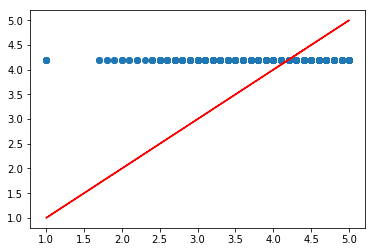

In [103]:
# Our predictions
plt.scatter(y_test,y_pred_lm_l)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [104]:
param = {'alpha': [1e-15, 1e-10,1e-8,1e-4,1e-3,1e-2,1e-1, 1, 5, 10, 20]}

In [105]:
lm_l = Lasso()
lasso_regressor = GridSearchCV(lm_l, param, scoring = 'neg_mean_absolute_error', cv= 5)

In [106]:
lasso_regressor.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
E:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [107]:
lasso_regressor.best_params_

{'alpha': 1e-15}

In [108]:
lasso_regressor.best_score_

-0.3477828577914289

In [109]:
# laso regression with optimal alpha value
lm_l = Lasso(alpha=1e-15)
lm_l.fit(X_train,y_train)

E:\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1e-15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [110]:
y_pred_lm_l = lm_l.predict(X_test)

In [111]:
mean_absolute_error(y_test, y_pred_lm_l)

0.3441135444504094

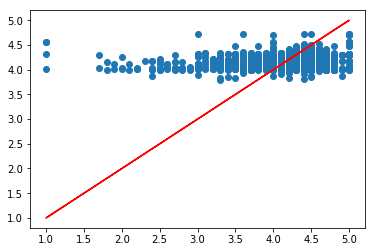

In [112]:
# Our predictions
plt.scatter(y_test,y_pred_lm_l)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Ridge Regressor

In [113]:
lm_r = Ridge()

In [114]:
np.mean(cross_val_score(lm_r,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.3486035900687378

In [115]:
lm_r.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
y_pred_lm_r = lm_r.predict(X_test)

In [117]:
mean_absolute_error(y_test, y_pred_lm_r)

0.34412751292837357

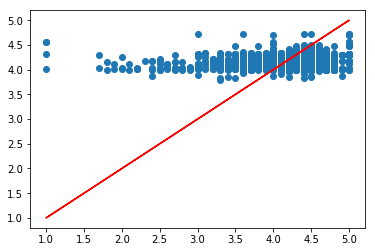

In [118]:
# Our predictions
plt.scatter(y_test,y_pred_lm_r)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [119]:
param = {'alpha': [1e-15, 1e-10,1e-8,1e-4,1e-3,1e-2,1e-1, 1, 5, 10, 20]}

In [120]:
lm_r = Ridge()
ridge_regressor = GridSearchCV(lm_r, param, scoring = 'neg_mean_absolute_error', cv= 3)

In [121]:
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [122]:
ridge_regressor.best_params_

{'alpha': 0.0001}

In [123]:
ridge_regressor.best_score_

-0.34837793828638186

In [124]:
# ridge regression with optimal alpha value
lm_r = Lasso(alpha=0.0001)
lm_r.fit(X_train,y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [125]:
y_pred_lm_r = lm_r.predict(X_test)

In [126]:
mean_absolute_error(y_test, y_pred_lm_r)

0.3442678551677434

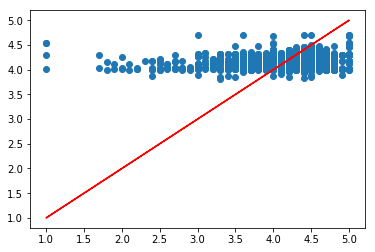

In [127]:
# Our predictions
plt.scatter(y_test,y_pred_lm_r)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Random Forest

In [128]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [129]:
np.mean(cross_val_score(rf,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


-0.36029034815493155

In [130]:
rf.fit(X_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [131]:
y_pred_rf = rf.predict(X_test)

In [132]:
mean_absolute_error(y_test, y_pred_rf)

0.3509615959183267

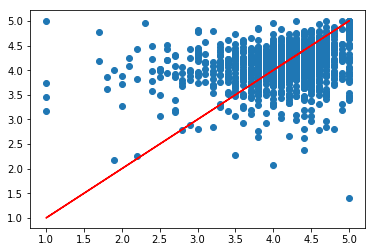

In [133]:
# Our predictions
plt.scatter(y_test,y_pred_rf)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [134]:
# tune model using grid search cv
rf = RandomForestRegressor()
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}
random_forest = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3, n_jobs=-1, verbose=10)

In [136]:
random_forest.fit(X_train,y_train)

Fitting 3 folds for each of 174 candidates, totalling 522 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   34.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   42.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': range(10, 300, 10), 'criterion': ('mse', 'mae'), 'max_features': ('auto', 'sqrt', 'log2')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=10)

In [137]:
random_forest.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [140]:
random_forest.best_score_

-0.3252333849101089

In [139]:
# Random Forest with optimal values
rf = RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=290, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [141]:
y_pred_rf = rf.predict(X_test)

In [142]:
mean_absolute_error(y_test, y_pred_rf)

0.3144807323902151

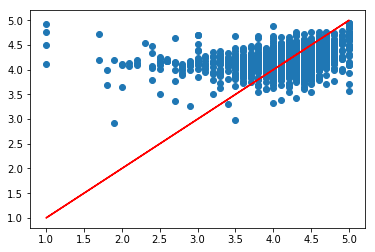

In [143]:
# Our predictions
plt.scatter(y_test,y_pred_rf)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Xgboost

In [144]:
import xgboost
xg=xgboost.XGBRegressor()

E:\Anaconda\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
E:\Anaconda\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [145]:
np.mean(cross_val_score(xg,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-0.35058107843351927

In [146]:
xg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [147]:
y_pred_xg = xg.predict(X_test)

In [148]:
mean_absolute_error(y_test, y_pred_xg)

0.3329639139465797

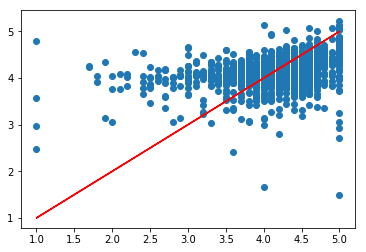

In [149]:
# Our predictions
plt.scatter(y_test,y_pred_xg)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [150]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [151]:
## Hyper Parameter Optimization

n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [152]:
xg=xgboost.XGBRegressor()

In [153]:
from sklearn.model_selection import RandomizedSearchCV

# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xg,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [154]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   10.7s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  2.0min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.9min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  5.8min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=None, gamma=None,
       gpu_id=None, importance_type='gain', interaction_constraints=None,
       learning_rate=None, max_delta_step=None, max_depth=None,
       min_child_we..._pos_weight=None, subsample=None,
       tree_method=None, validate_parameters=None, verbosity=None),
          fit_params=None, iid='warn', n_iter=50, n_jobs=4,
          param_distributions={'n_estimators': [100, 500, 900, 1100, 1500], 'max_depth': [2, 3, 5, 10, 15], 'learning_rate': [0.05, 0.1, 0.15, 0.2], 'min_child_weight': [1, 2, 3, 4], 'booster': ['gbtree', 'gblinear'], 'base_score': [0.25, 0.5, 0.75, 1]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=5)

In [155]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [156]:
random_cv.best_score_

-0.3326505488883227

In [159]:
# Xgboost with optimal values
xg = xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, monotone_constraints='()',
       n_estimators=900, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)
xg.fit(X_train,y_train)

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.05, max_delta_step=0, max_depth=2,
       min_child_weight=4, missing=nan, monotone_constraints='()',
       n_estimators=900, n_jobs=0, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [160]:
y_pred_xg = xg.predict(X_test)

In [161]:
mean_absolute_error(y_test, y_pred_xg)

0.326346611416238

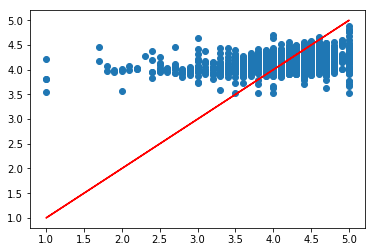

In [162]:
# Our predictions
plt.scatter(y_test,y_pred_xg)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## ANN

In [163]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [164]:
X_train.shape

(7488, 24)

In [165]:
model = Sequential()

model.add(Dense(24, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(16, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(10, activation='relu'))
model.add(Dropout(.2))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [166]:
from tensorflow.keras.callbacks import EarlyStopping

In [167]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [168]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
234/234 [==============================] - 1s 3ms/step - loss: 5.1151 - val_loss: 0.3516
Epoch 2/600
234/234 [==============================] - 0s 2ms/step - loss: 1.8325 - val_loss: 0.3945
Epoch 3/600
234/234 [==============================] - 0s 2ms/step - loss: 1.4881 - val_loss: 0.3381
Epoch 4/600
234/234 [==============================] - 0s 2ms/step - loss: 1.3870 - val_loss: 0.3066
Epoch 5/600
234/234 [==============================] - 0s 2ms/step - loss: 1.2793 - val_loss: 0.2982
Epoch 6/600
234/234 [==============================] - 0s 2ms/step - loss: 1.1734 - val_loss: 0.3168
Epoch 7/600
234/234 [==============================] - 0s 2ms/step - loss: 1.1102 - val_loss: 0.2956
Epoch 8/600
234/234 [==============================] - 0s 2ms/step - loss: 0.9964 - val_loss: 0.3270
Epoch 9/600
234/234 [==============================] - 0s 2ms/step - loss: 0.9473 - val_loss: 0.3052
Epoch 10/600
234/234 [==============================] - 0s 2ms/step - loss: 0.8759 - val_lo

In [169]:
losses = pd.DataFrame(model.history.history)

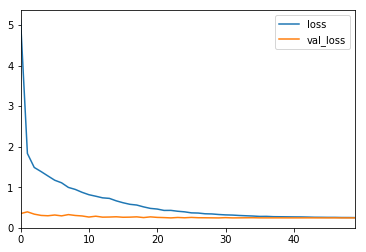

In [170]:
losses.plot()

In [171]:
predictions = model.predict(X_test)

In [172]:
mean_absolute_error(y_test,predictions)

0.34625371376163944

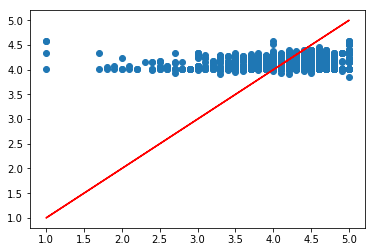

In [173]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

## Saving Models

In [174]:
import pickle

In [175]:
pickle.dump(lm, open('model_lm.pkl', 'wb'))

In [176]:
pickle.dump(lm_l, open('model_lm_l.pkl', 'wb'))

In [177]:
pickle.dump(lm_r, open('model_lm_r.pkl', 'wb'))

In [178]:
pickle.dump(rf, open('model_rf.pkl', 'wb'))

In [179]:
pickle.dump(xg, open('model_xg.pkl', 'wb'))

In [180]:
model.save('model_ann.h5')

In [181]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))